Importing libraries

In [92]:
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib
import matplotlib.pyplot as plt

Printing versions of libraries

In [93]:
print('numpy version: {}'.format(np.__version__))
print('skikit-learn version: {}'.format(sklearn.__version__)) 
print('matplotlib version: {}'.format(matplotlib.__version__))

numpy version: 1.23.5
skikit-learn version: 1.2.1
matplotlib version: 3.7.0


Creating dummy data for actual and predicted labels

In [94]:
actual = np.array(
    ['Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog'])
predicted = np.array(
    ['Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog'])

Computing confusion matrix

In [95]:
cm = confusion_matrix(actual, predicted)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[4 1]
 [2 3]]


Computing accuracy, precision, recall and f1-score

In [96]:
accuracy = accuracy_score(actual, predicted)
print('Accuracy  :', accuracy)
precision = precision_score(actual, predicted, pos_label='Cat')
print('Precision :', precision) 
recall = recall_score(actual, predicted, pos_label='Cat')
print('Recall    :', recall)
F1_Score = f1_score(actual, predicted, pos_label='Cat')
print('F1-Score  :', F1_Score)

Accuracy  : 0.7
Precision : 0.6666666666666666
Recall    : 0.8
F1-Score  : 0.7272727272727272


Plotting the confusion matrix

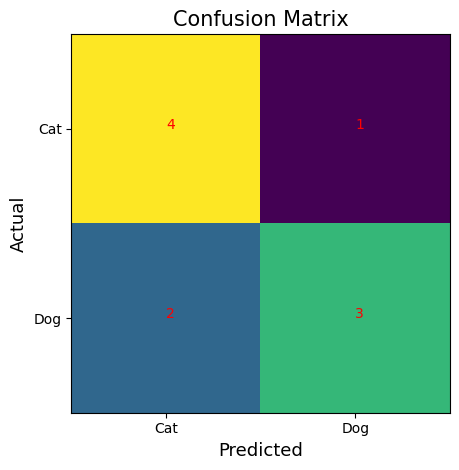

In [97]:
fig, ax = plt.subplots()
im = ax.imshow(cm)

# Showing all ticks and labelling them with the respective list entries
ax.set_xticks(np.arange(2), labels=['Cat', 'Dog'])
ax.set_yticks(np.arange(2), labels=['Cat', 'Dog'])

# Setting labels for x-axis and y-axis
ax.set_xlabel('Predicted', fontsize=13)
ax.set_ylabel('Actual', fontsize=13)

# Creating text annotations.
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j], color='r')

ax.set_title('Confusion Matrix', fontsize=15)
fig.tight_layout()
plt.show()